In [61]:
#Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as sch

In [62]:
#Read the dataset
movies = pd.read_csv('movies.csv')

In [63]:
#View the first five rows of the dataset
display(movies)

,Id,MovName,Actor,Director,Genre,Year
0,1,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019
1,2,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018
2,3,Logan,Hugh Jackman,James Mangold,Comic-Book,2017
3,4,Her,Joaquin Phoenix,Spike Jonze,Drama,2016
4,5,The Prestige,Christian Bale,Christopher Nolan,Drama,2006
5,6,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014
6,7,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008
7,8,The Fighter,Christian Bale,David O Russell,Drama,2010
8,9,American Hustle,Christian Bale,David O Russell,Drama,2013
9,10,Knight and Day,Tom Cruise,James Mangold,Action,2010


In [64]:
#Describing the dataset
movies.describe()

,Id,Year
count,10.00000,10.00000
mean,5.50000,2013.10000
std,3.02765,4.45845
min,1.00000,2006.00000
25%,3.25000,2010.00000
50%,5.50000,2013.50000
75%,7.75000,2016.75000
max,10.00000,2019.00000


#### We have only 10 rows in the dataset 

In [65]:
#Checking the info to see the type and see if there are any missing data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
Id          10 non-null int64
MovName     10 non-null object
Actor       10 non-null object
Director    10 non-null object
Genre       10 non-null object
Year        10 non-null int64
dtypes: int64(2), object(4)
memory usage: 560.0+ bytes


#### Id and Year are non-numeric features in the dataset. Id is not useful as it is a numbered index and does not give any useful insight

In [66]:
#Deleting the id column from the dataset
del movies['Id']

In [67]:
#Checking the description of year
movies['Year'].describe()

count      10.00000
mean     2013.10000
std         4.45845
min      2006.00000
25%      2010.00000
50%      2013.50000
75%      2016.75000
max      2019.00000
Name: Year, dtype: float64

#### We can see that oldest movie in the dataset was released in 2006 and the latest was released in 2019

In [68]:
actors = movies.groupby('Actor')
for actor,rows in actors:
    display(actor,rows)

'Christian Bale'

,MovName,Actor,Director,Genre,Year
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008
7,The Fighter,Christian Bale,David O Russell,Drama,2010
8,American Hustle,Christian Bale,David O Russell,Drama,2013


'Hugh Jackman'

,MovName,Actor,Director,Genre,Year
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017


'Joaquin Phoenix'

,MovName,Actor,Director,Genre,Year
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016


'Tom Cruise'

,MovName,Actor,Director,Genre,Year
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018
9,Knight and Day,Tom Cruise,James Mangold,Action,2010


#### We can see that Christian Bale has highest number of movies in dataset i.e. 5, Joaquin Phoenix and Tom Cruise have two movies each and Hugh Jackman has a single movie
#### Of the 5 movies of Chrisitan Bale, 3 movies are directed by Christopher Nolan and 2 movies are directed by David O Russell 

In [69]:
directors = movies.groupby('Director')
for director,rows in directors:
    display(director,rows)

'Christopher McQuarrie'

,MovName,Actor,Director,Genre,Year
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018


'Christopher Nolan'

,MovName,Actor,Director,Genre,Year
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008


'David O Russell'

,MovName,Actor,Director,Genre,Year
7,The Fighter,Christian Bale,David O Russell,Drama,2010
8,American Hustle,Christian Bale,David O Russell,Drama,2013


'James Mangold'

,MovName,Actor,Director,Genre,Year
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017
9,Knight and Day,Tom Cruise,James Mangold,Action,2010


'Spike Jonze'

,MovName,Actor,Director,Genre,Year
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016


'Todd Phillips'

,MovName,Actor,Director,Genre,Year
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019


#### There are 6 unique directors, Christopher Nolan and David O Russell have only worked with Christian Bale whereas James Mangold has worked with 2 actors, Hugh Jackman and Tom Cruise

In [70]:
genres = movies.groupby('Genre')
for genre,rows in genres:
    display(genre,rows)

'Action'

,MovName,Actor,Director,Genre,Year
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018
9,Knight and Day,Tom Cruise,James Mangold,Action,2010


'Comic-Book'

,MovName,Actor,Director,Genre,Year
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008


'Drama'

,MovName,Actor,Director,Genre,Year
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006
7,The Fighter,Christian Bale,David O Russell,Drama,2010
8,American Hustle,Christian Bale,David O Russell,Drama,2013


#### There are 3 unique Genres
#### We can see that only Tom Cruise has acted in Action Movies, Christian Bale and Joaquin Phoenix have acted in both Comic-Book and Drama movies
#### David O Russell has directed only Drama Movies movies, Christopher Nolan has directed Comic-Book and Drama movies and James Mangold has directed Comic-Book and Action movies

# ------------------------------------------------------------------------------

In [71]:
#### We have completed EDA and now moving on to Modeling
#### Before Modeling we have to change the data to numeric format as KMeans do not work with categorical variable
#### Hence creating dummy variables for Actor, Director and Genre

In [72]:
#Creating dummy variables
actor_dummy = pd.get_dummies(movies['Actor'])
director_dummy = pd.get_dummies(movies['Director'])
genre_dummy = pd.get_dummies(movies['Genre'])

In [73]:
#Concatenating the dummy variables to the original dataset
movie_dummy_set = pd.concat([movies,actor_dummy,director_dummy,genre_dummy],axis=1)

In [74]:
#Deleting categorical variable from the dummy set
del movie_dummy_set['MovName']
del movie_dummy_set['Actor']
del movie_dummy_set['Director']
del movie_dummy_set['Genre']

In [75]:
movie_dummy_set

,Year,Christian Bale,Hugh Jackman,Joaquin Phoenix,Tom Cruise,Christopher McQuarrie,Christopher Nolan,David O Russell,James Mangold,Spike Jonze,Todd Phillips,Action,Comic-Book,Drama
0,2019,0,0,1,0,0,0,0,0,0,1,0,1,0
1,2018,0,0,0,1,1,0,0,0,0,0,1,0,0
2,2017,0,1,0,0,0,0,0,1,0,0,0,1,0
3,2016,0,0,1,0,0,0,0,0,1,0,0,0,1
4,2006,1,0,0,0,0,1,0,0,0,0,0,0,1
5,2014,1,0,0,0,0,1,0,0,0,0,0,1,0
6,2008,1,0,0,0,0,1,0,0,0,0,0,1,0
7,2010,1,0,0,0,0,0,1,0,0,0,0,0,1
8,2013,1,0,0,0,0,0,1,0,0,0,0,0,1
9,2010,0,0,0,1,0,0,0,1,0,0,1,0,0


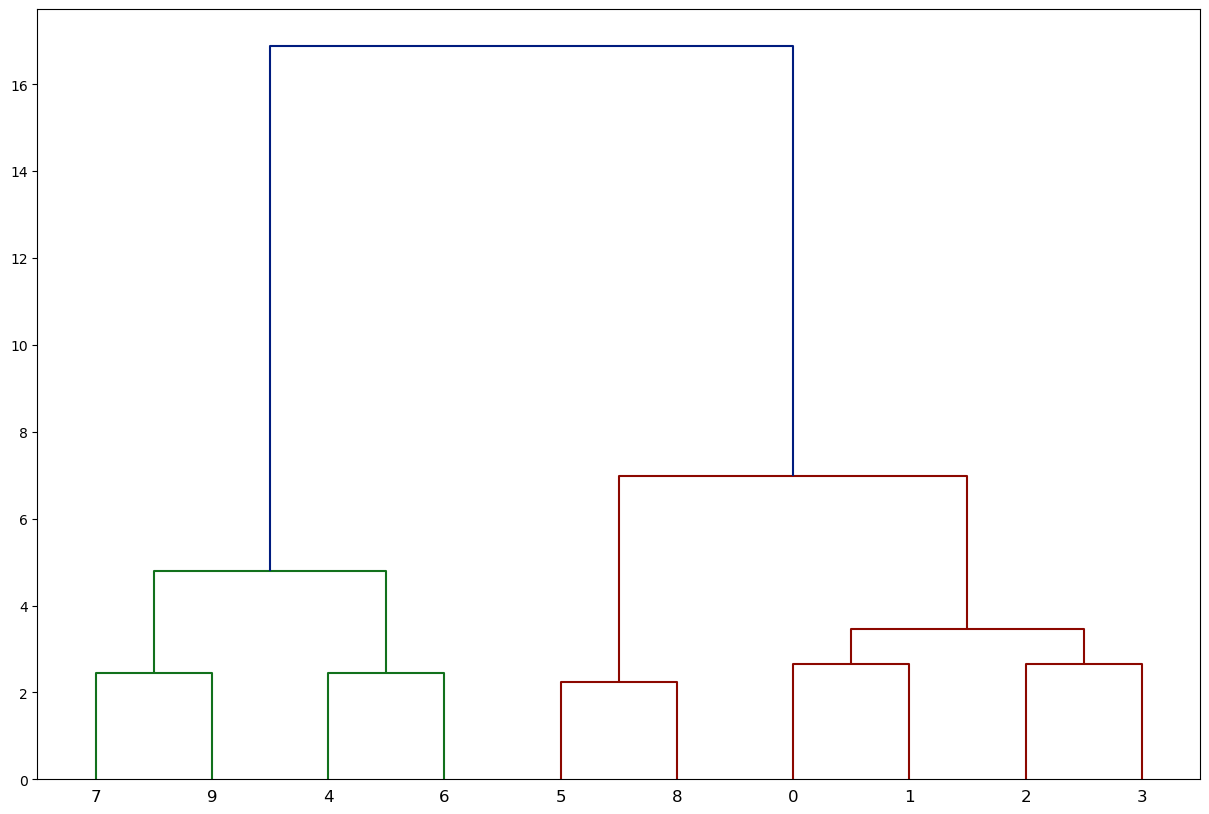

In [76]:
#Plotting Dendrogram using Ward's method
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(movie_dummy_set,method='ward'))

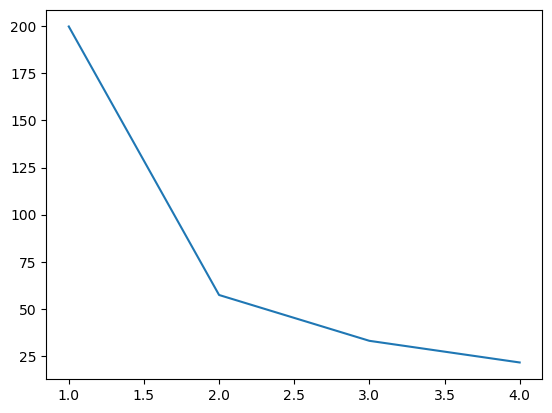

In [77]:
wcss = []
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(movie_dummy_set)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)

In [78]:
#Appling KMeans with K=2
kmeans = KMeans(2)
kfit = kmeans.fit(movie_dummy_set)
identified_clusters = kfit.predict(movie_dummy_set)

In [79]:
#Appending the identified clusters to the dataframe
clustered_data = movies.copy()
clustered_data['Cluster'] = identified_clusters

In [80]:
clustered_data.sort_values(by='Cluster')

,MovName,Actor,Director,Genre,Year,Cluster
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006,0
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008,0
7,The Fighter,Christian Bale,David O Russell,Drama,2010,0
9,Knight and Day,Tom Cruise,James Mangold,Action,2010,0
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019,1
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018,1
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017,1
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016,1
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014,1
8,American Hustle,Christian Bale,David O Russell,Drama,2013,1


In [81]:
import seaborn as sns
sns.set()
sns.set_color_codes(palette="dark")
sns.reset_defaults()

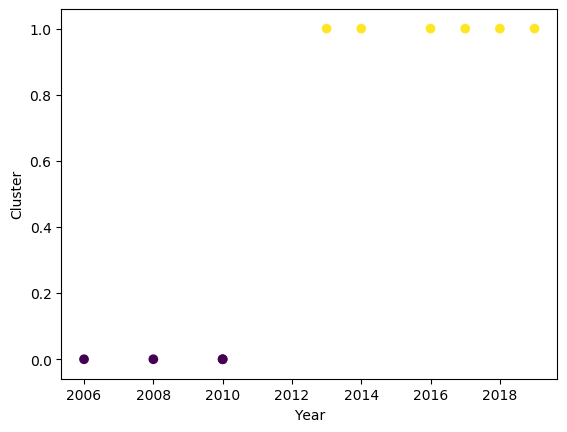

In [82]:
plt.xlabel('Year')
plt.ylabel('Cluster')
plt.scatter(clustered_data['Year'],clustered_data['Cluster'],c=clustered_data['Cluster'])
# plt.scatter(clustered_data_scaled['Director'],clustered_data_scaled['Cluster'],c=clustered_data_scaled['Cluster'])
# plt.scatter(clustered_data_scaled['Genre'],clustered_data_scaled['Cluster'],c=clustered_data_scaled['Cluster'])
plt.show()

#### We can see that Clusters are based on the year, KMeans has grouped movies into two clusters, in one cluster movies are release in 2010 and before and in the other, the movies are released post 2010
#### But why were clusters based on Year and not any other feature, well because we forgot one important step which is to be done before Clustering i.e Scaling
#### The values in Year are in the range of 2010s whereas values of other features are either 0 or 1 as they are categorical and hence KMeans considers Year feature as the most significant feature

In [83]:
from sklearn import preprocessing


In [84]:
movies_values = movie_dummy_set.values
#Passing the values of the dataset to Min-Max-Scaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(movies_values)
movies_scaled = pd.DataFrame(x_scaled,columns=movie_dummy_set.columns)

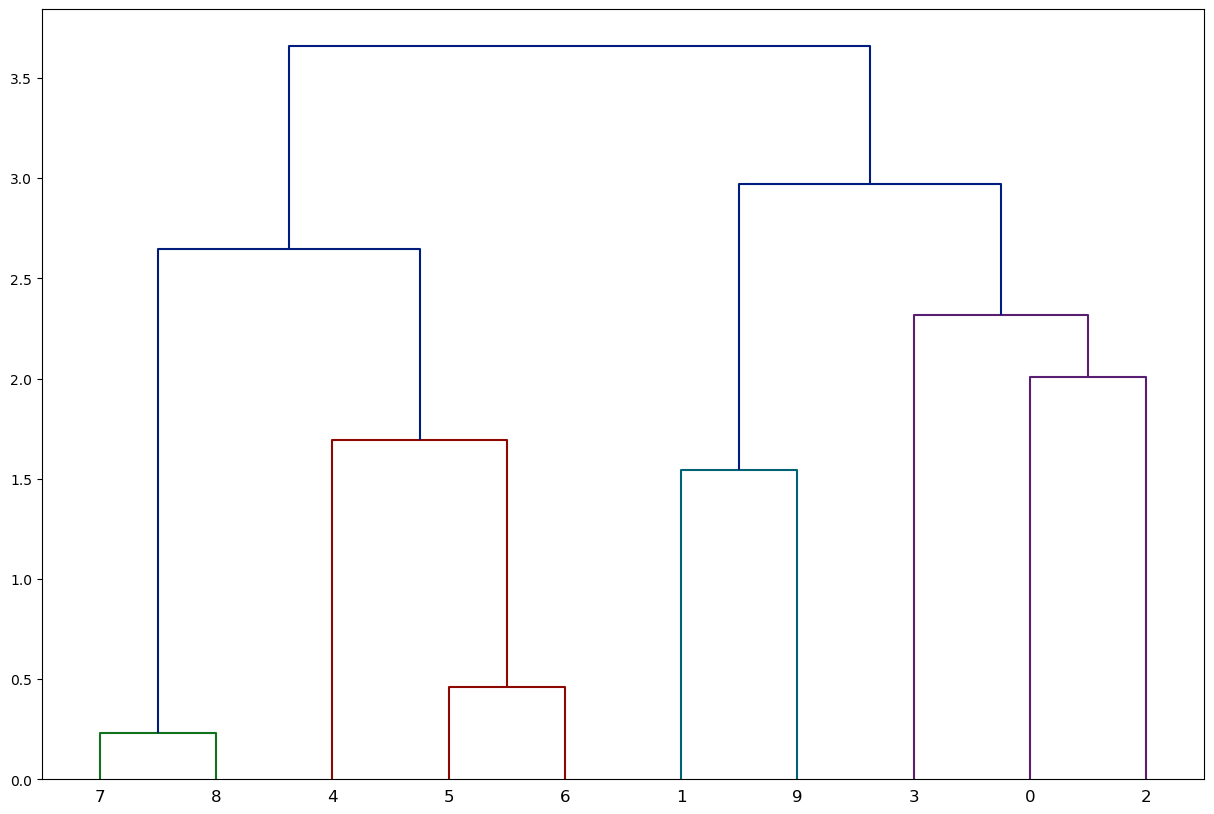

In [85]:
#Plotting Dendrogram using Ward's method
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(movies_scaled,method='ward'))

In [86]:
#### After scaling data we obtain a different dendrogram

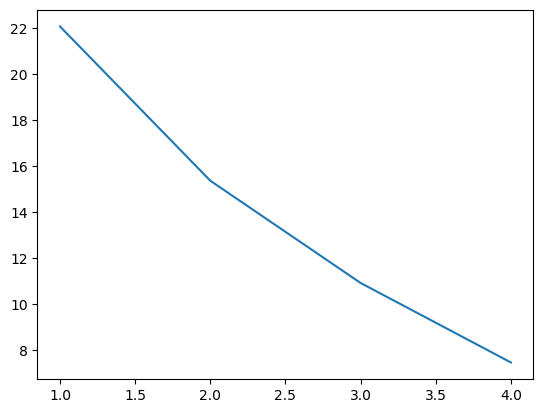

In [87]:
wcss = []
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(movies_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,5),wcss)

In [88]:
kmeans = KMeans(2)
kfit = kmeans.fit(movies_scaled)
identified_clusters_scaled = kfit.predict(movies_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = movies.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
clustered_data_scaled.sort_values(by='Cluster')

,MovName,Actor,Director,Genre,Year,Cluster
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006,0
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014,0
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008,0
7,The Fighter,Christian Bale,David O Russell,Drama,2010,0
8,American Hustle,Christian Bale,David O Russell,Drama,2013,0
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019,1
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018,1
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017,1
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016,1
9,Knight and Day,Tom Cruise,James Mangold,Action,2010,1


#### Now when the Clusters are two, the deciding feature is no longer Year, the clusters are based on Actor, One Cluster belongs to movies where Actor is Christian Bale and the other Cluster belongs to movies where the Actor is not Christian Bale
#### Let's see what happens when the number of clusters is 3

In [89]:
kmeans = KMeans(3)
kfit = kmeans.fit(movies_scaled)
identified_clusters_scaled = kfit.predict(movies_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = movies.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
clustered_data_scaled.sort_values(by='Cluster')

,MovName,Actor,Director,Genre,Year,Cluster
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019,0
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017,0
5,Batman Begins,Christian Bale,Christopher Nolan,Comic-Book,2014,0
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008,0
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016,1
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006,1
7,The Fighter,Christian Bale,David O Russell,Drama,2010,1
8,American Hustle,Christian Bale,David O Russell,Drama,2013,1
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018,2
9,Knight and Day,Tom Cruise,James Mangold,Action,2010,2


#### We can see that now the Clusters are based on Genre, Movies where Genre is Drama they belong to Cluster 0; Action Genre movies belong to Cluster 1 and Comic-Book Genre movies belong to Cluster 2
#### Let's see what happens when the number of clusters is 3

In [60]:
kmeans = KMeans(4)
kfit = kmeans.fit(movies_scaled)
identified_clusters_scaled = kfit.predict(movies_scaled)
#Appending the identified clusters to the dataframe
clustered_data_scaled = movies.copy()
clustered_data_scaled['Cluster'] = identified_clusters_scaled
clustered_data_scaled.sort_values(by='Cluster')

,MovName,Actor,Director,Genre,Year,Cluster
5,The Dark Knight Rises,Christian Bale,Christopher Nolan,Comic-Book,2012,0
6,The Dark Knight,Christian Bale,Christopher Nolan,Comic-Book,2008,0
1,Mission Impossible: Fallout,Tom Cruise,Christopher McQuarrie,Action,2018,1
9,Knight and Day,Tom Cruise,James Mangold,Action,2010,1
4,The Prestige,Christian Bale,Christopher Nolan,Drama,2006,2
7,The Fighter,Christian Bale,David O Russell,Drama,2010,2
8,American Hustle,Christian Bale,David O Russell,Drama,2013,2
0,Joker,Joaquin Phoenix,Todd Phillips,Comic-Book,2019,3
2,Logan,Hugh Jackman,James Mangold,Comic-Book,2017,3
3,Her,Joaquin Phoenix,Spike Jonze,Drama,2016,3


#### Here, 2 of 4 clusters contain movies starring Christian Bale in which one cluster contain movies which are directed by Christopher Nolan and the other cluster contain movies which are directed by David O Russell 
#### Another cluster contain movies starring Tom Cruise and the last cluster contain remaining movies

#### We can see that how changing the number of clusters changes the grouping and it all depends on the Data Scientist to decide the number of clusters

In [ ]:
plt.scatter(clustered_data['Actor'], clustered_data['Cluster'], c=identified_clusters_scaled, s=50, cmap='viridis')

In [ ]:
plt.scatter(clustered_data_scaled[identified_clusters_scaled == 0, 0], clustered_data_scaled[identified_clusters_scaled == 0, 1], s = 100, c='red', label ='Cluster 1')
plt.scatter(X[Y_kmeans == 1, 0], X[Y_kmeans == 1, 1], s = 100, c='blue', label ='Cluster 2')
plt.scatter(X[Y_kmeans == 2, 0], X[Y_kmeans == 2, 1], s = 100, c='magenta', label ='Cluster 3')
plt.scatter(X[Y_kmeans == 3, 0], X[Y_kmeans == 3, 1], s = 100, c='green', label ='Cluster 4')
plt.title('Clusters of Customers')
plt.xlabel('Miles')
plt.ylabel('Membership Days')
plt.legend()
plt.show()